In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

import warnings
warnings.filterwarnings("ignore")


In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)
     

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.926317,1.651344,-0.898604,2.073483,-0.745431,0
1,0.408874,2.656167,-0.182517,2.145500,-1.506360,0
2,-0.164974,0.726514,2.109528,-0.721717,-1.043622,0
3,-2.091202,0.941210,1.987119,0.165271,-1.506397,0
4,-1.766581,1.074765,2.384852,-0.383087,-1.536864,0


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)
     

In [5]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df
     

In [6]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [7]:
df1 = combined_sampling(df,0.5,0.5)

In [8]:
df2 = combined_sampling(df,0.5,0.5)
     

In [9]:
df3 = combined_sampling(df,0.5,0.5)

In [10]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col2', 'target'], dtype='object')
Index(['col2', 'col5', 'target'], dtype='object')
Index(['col4', 'col3', 'target'], dtype='object')


In [11]:
df3

,col4,col3,target
54,4.034315,-1.222369,0
45,0.835004,-1.314494,1
23,-0.617154,2.644354,0
33,0.867713,1.333318,0
61,1.040864,-1.955925,1
47,2.059891,0.605526,1
82,1.942538,-0.459233,1
1,2.145500,-0.182517,0
41,1.960054,0.524342,0
73,0.181971,-2.042418,1


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()
     

In [13]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [14]:
from sklearn.tree import plot_tree
     

[Text(0.359375, 0.95, 'x[1] <= 1.045\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.125, 0.85, 'x[0] <= -3.01\ngini = 0.483\nsamples = 22\nvalue = [9, 13]'),
 Text(0.2421875, 0.8999999999999999, 'True  '),
 Text(0.0625, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1875, 0.75, 'x[1] <= 0.94\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.125, 0.65, 'x[1] <= -0.704\ngini = 0.484\nsamples = 17\nvalue = [7, 10]'),
 Text(0.0625, 0.55, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1875, 0.55, 'x[1] <= -0.543\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.125, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.25, 0.45, 'x[1] <= 0.638\ngini = 0.473\nsamples = 13\nvalue = [5, 8]'),
 Text(0.125, 0.35, 'x[0] <= -0.909\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.0625, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.1875, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.35, 'x[0] <= -1.672\ngini = 0.49\nsam

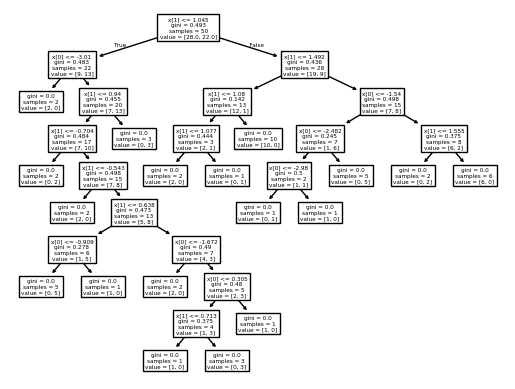

In [15]:
plot_tree(clf1)

[Text(0.5666666666666667, 0.9444444444444444, 'x[0] <= 1.045\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.3333333333333333, 0.8333333333333334, 'x[1] <= -1.835\ngini = 0.32\nsamples = 25\nvalue = [5, 20]'),
 Text(0.44999999999999996, 0.8888888888888888, 'True  '),
 Text(0.2, 0.7222222222222222, 'x[1] <= -2.552\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.13333333333333333, 0.6111111111111112, 'x[0] <= 0.64\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.06666666666666667, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2, 0.5, 'x[1] <= -3.697\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.13333333333333333, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.26666666666666666, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.6111111111111112, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4666666666666667, 0.7222222222222222, 'x[1] <= 0.417\ngini = 0.105\nsamples = 18\nvalue

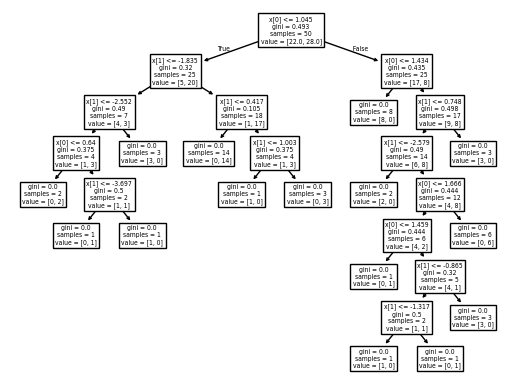

In [16]:

plot_tree(clf2)


[Text(0.3392857142857143, 0.9285714285714286, 'x[1] <= -0.902\ngini = 0.461\nsamples = 50\nvalue = [18, 32]'),
 Text(0.14285714285714285, 0.7857142857142857, 'x[0] <= 2.693\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.24107142857142858, 0.8571428571428572, 'True  '),
 Text(0.07142857142857142, 0.6428571428571429, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.21428571428571427, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5357142857142857, 0.7857142857142857, 'x[0] <= 1.667\ngini = 0.491\nsamples = 30\nvalue = [17, 13]'),
 Text(0.4375, 0.8571428571428572, '  False'),
 Text(0.35714285714285715, 0.6428571428571429, 'x[1] <= 0.174\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.42857142857142855, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.7142857142857143, 0.6428571428571429, 'x[1] <= 0.554\ngini = 0.465\nsamples = 19\nvalue = [7, 12]'),
 Text(0.5

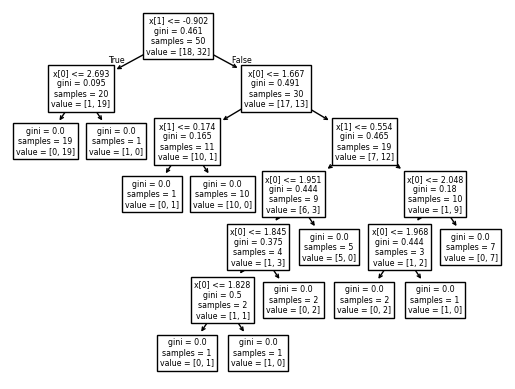

In [17]:
plot_tree(clf3)
     

In [18]:

clf1.predict(np.array([0.781099 ,	-0.337154]).reshape(1,2))

array([0])

In [19]:

clf2.predict(np.array([0.781099	,-0.337154]).reshape(1,2))

array([1])

In [20]:
clf3.predict(np.array([0.781099	,-0.337154]).reshape(1,2))

array([1])

In [21]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
6,-1.034809,0.704220,-1.537923,0.857397,-1.072936,1
30,-1.580584,1.800864,-0.711918,-0.401099,-1.179999,1
77,-2.830145,-0.283258,2.176536,0.330763,-0.376532,0
67,-2.056504,0.720456,1.736690,-0.141607,-3.068538,0
76,-0.518545,1.627647,1.370346,1.342904,0.537358,0
87,0.847799,2.851516,2.200155,2.435295,-0.966721,1
60,-1.111889,1.741478,0.123072,1.813233,-1.573838,1
69,-0.187779,0.920147,0.184339,2.151414,0.530339,0
81,-1.663826,0.530451,-1.347220,0.349288,0.083507,1
69,-0.187779,0.920147,0.184339,2.151414,0.530339,0
